In [1]:
from maze_env import Maze
from maze_PTR_model import MazePTRModel
import torch
import numpy as np
import pickle
import matplotlib.pyplot as plt

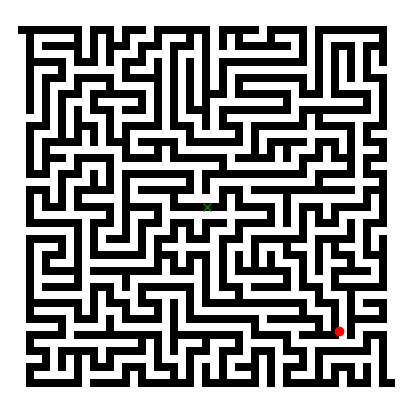

In [2]:
# create a mazeptrmodel and load in the parameters from world_1/length_1/models/best_model.pt
model = MazePTRModel()
model.load_state_dict(torch.load('world_1/length_1/models/best_model.pt'))
env = Maze(sparse=False, model = model)
env.plot()


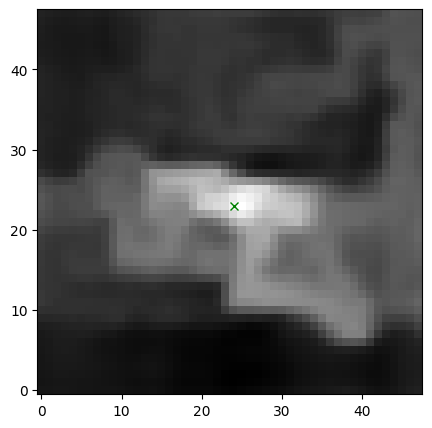

In [3]:
env.plot_reward()

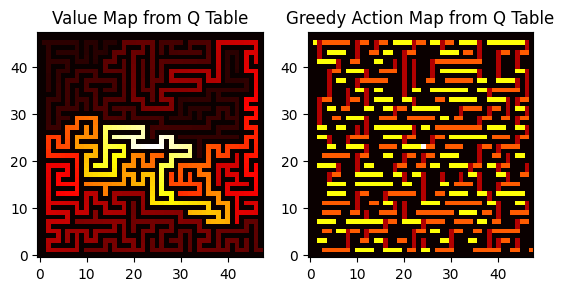

In [4]:
# load in a numpy array from the file world_1/Q_table.pkl
with open('world_1/Q_table.pkl', 'rb') as f:
    Q_table = pickle.load(f)

# create a matrix with with env.Nx rows and env.Ny columns, each element being the max of the Q_table
value_map = np.max(Q_table, axis=1).reshape(env.Nx, env.Ny)

# create a matrix with with env.Nx rows and env.Ny columns, each element being the argmax of the Q_table
action_map_1 = np.argmax(Q_table, axis=1).reshape(env.Nx, env.Ny)

# plot the aciton map
fig, axes = plt.subplots(1, 2)
axes[0].imshow(value_map.T, origin="lower", cmap='hot', interpolation='nearest')
#axes[0].set_colorbar()
axes[0].set_title('Value Map from Q Table')
axes[1].imshow(action_map_1.T, origin="lower", cmap='hot', interpolation='nearest')
#axes[1].set_colorbar()
axes[1].set_title('Greedy Action Map from Q Table')
plt.show()

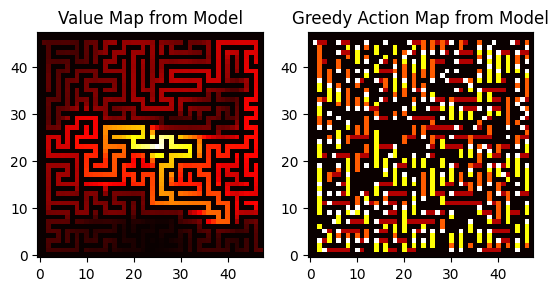

In [5]:
predicted_value_map = env.reward_landscape
action_map_2 = np.zeros((env.Nx, env.Ny))
for i, j in np.ndindex(env.Nx, env.Ny):
    if env.occ_map[i, j]:
        predicted_value_map[i, j] = 0

for i, j in np.ndindex(env.Nx, env.Ny):
    if env.occ_map[i, j]:
        continue
    self_value = predicted_value_map[i, j]
    down_value = predicted_value_map[i, j] if i == 0 else predicted_value_map[i - 1, j]
    up_value = predicted_value_map[i, j] if i == env.Nx - 1 else predicted_value_map[i + 1, j]
    left_value = predicted_value_map[i, j] if j == 0 else predicted_value_map[i, j - 1]
    right_value = predicted_value_map[i, j] if j == env.Ny - 1 else predicted_value_map[i, j + 1]
    max_index = np.argmax([up_value, down_value, left_value, right_value, self_value])
    action_map_2[i, j] = max_index

predicted_value_map *= 1000

# plot the aciton map
fig, axes = plt.subplots(1, 2)
axes[0].imshow(predicted_value_map.T, origin="lower", cmap='hot', interpolation='nearest')
#axes[0].set_colorbar()
axes[0].set_title('Value Map from Model')
axes[1].imshow(action_map_2.T, origin="lower", cmap='hot', interpolation='nearest')
#axes[1].set_colorbar()
axes[1].set_title('Greedy Action Map from Model')
plt.show()


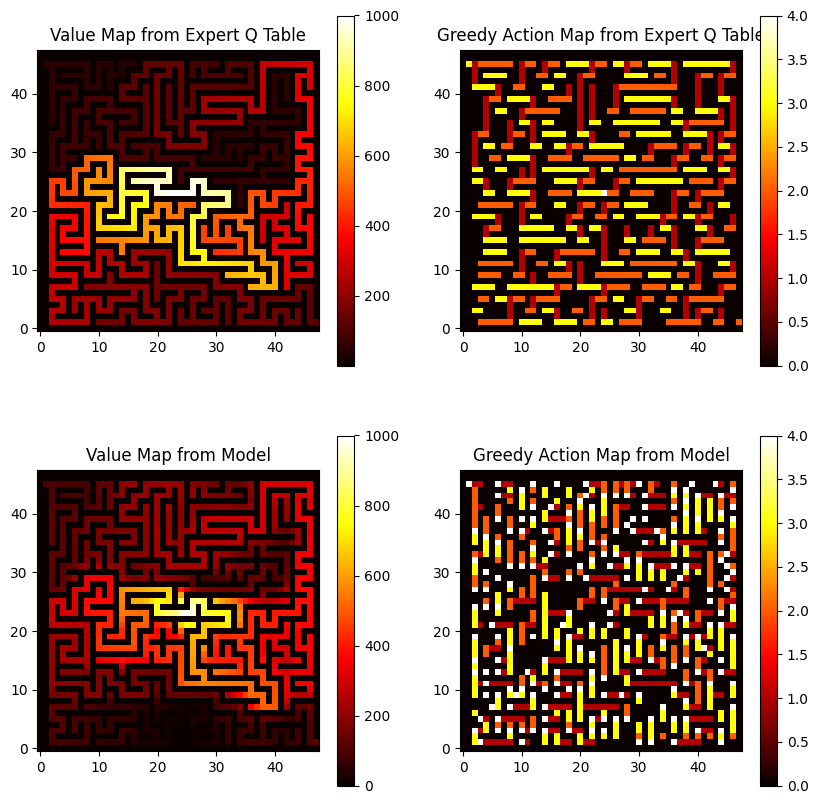

In [6]:
# plot the four together
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plot1 = axes[0, 0].imshow(value_map.T, origin="lower", cmap='hot', interpolation='nearest')
plt.colorbar(plot1, ax=axes[0, 0])
axes[0, 0].set_title('Value Map from Expert Q Table')
plot2 = axes[0, 1].imshow(action_map_1.T, origin="lower", cmap='hot', interpolation='nearest')
plt.colorbar(plot2, ax=axes[0, 1])
axes[0, 1].set_title('Greedy Action Map from Expert Q Table')
plot3 = axes[1, 0].imshow(predicted_value_map.T, origin="lower", cmap='hot', interpolation='nearest')
plt.colorbar(plot3, ax=axes[1, 0])
axes[1, 0].set_title('Value Map from Model')
plot4 = axes[1, 1].imshow(action_map_2.T, origin="lower", cmap='hot', interpolation='nearest')
plt.colorbar(plot4, ax=axes[1, 1])
axes[1, 1].set_title('Greedy Action Map from Model')
plt.show()